# Case Study - Recognising Hand Written Digits

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Data

In [3]:
df = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/mnist.csv')

df.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_55,pixel_56,pixel_57,pixel_58,pixel_59,pixel_60,pixel_61,pixel_62,pixel_63,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [4]:
df.shape

(1797, 65)

In [5]:
df.label.value_counts()

3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: label, dtype: int64

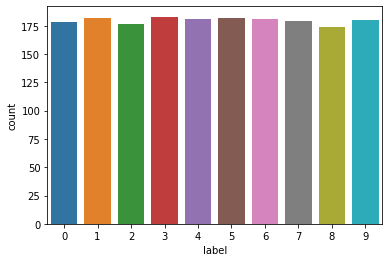

In [6]:
sns.countplot(data=df, x='label')

In [7]:
X = df.drop('label', axis=1)

y = df['label']

In [8]:
idx = np.random.randint(0, 1796, 9)

print(idx)

[ 613 1246 1374 1105  294 1013  249  590 1410]


8
[[ 0.  0.  4. 15. 14. 10.  1.  0.]
 [ 0.  0.  7.  9.  0.  9.  8.  0.]
 [ 0.  0. 11.  9.  2. 13.  7.  0.]
 [ 0.  0.  4. 15. 14.  4.  0.  0.]
 [ 0.  0.  6. 15. 15.  1.  0.  0.]
 [ 0.  4. 14.  1. 13.  7.  0.  0.]
 [ 0.  7. 13.  1.  5. 13.  0.  0.]
 [ 0.  0.  7. 14. 16. 16.  1.  0.]]


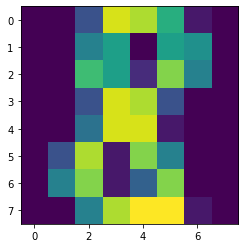

In [9]:
print(y[idx[4]])

print(np.reshape(X.values[idx[4]], (8,8)))

img = np.reshape(X.values[idx[4]], (8,8))

plt.imshow(img)

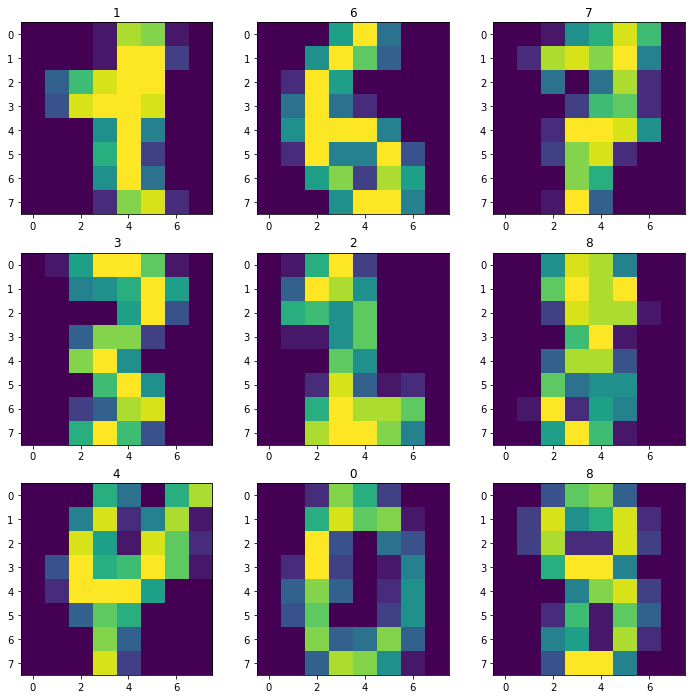

In [10]:
plt.figure(figsize=(12, 12))
idx = np.random.randint(0, 1796, 9)

for i in range(len(idx)):
    plt.subplot(3, 3, i+1)
    plt.title(y[idx[i]])
    img_grid = np.reshape(X.values[idx[i]], (8,8))
    plt.imshow(img_grid)

### Test Train Split

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


### Training
### Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Prediction

In [13]:
y_test_pred = classifier.predict(X_test)

### Measuring Performance

#### Accuracy

In [14]:
# calculate accuracy of class predictions

from sklearn import metrics

metrics.accuracy_score(y_test, y_test_pred)

0.9511111111111111

#### Confusion Metrics

In [15]:
# print the confusion matrix
con_metrics = metrics.confusion_matrix(y_test, y_test_pred)
con_metrics

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 40,  0,  0,  0,  0,  0,  0,  2,  1],
       [ 0,  1, 40,  3,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 43,  0,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0, 37,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 46,  0,  0,  0,  2],
       [ 0,  1,  0,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  1,  1,  0,  0, 46,  0,  0],
       [ 0,  3,  1,  0,  0,  0,  0,  0, 43,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 45]])

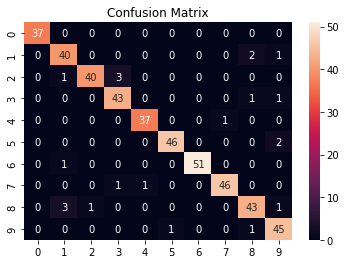

In [16]:
#ploting heatmap for confusion matrix

sns.heatmap(con_metrics, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

#### Classification Report

In [17]:
#Checking Precision, Recall and F1 Score
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.93      0.91        43
           2       0.98      0.91      0.94        44
           3       0.91      0.96      0.93        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       1.00      0.98      0.99        52
           7       0.98      0.96      0.97        48
           8       0.91      0.90      0.91        48
           9       0.90      0.96      0.93        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



### Decision Tree Model

In [18]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

y_test_pred = dt_classifier.predict(X_test)

metrics.accuracy_score(y_test, y_test_pred)

0.86

### Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

y_test_pred = rf_classifier.predict(X_test)

metrics.accuracy_score(y_test, y_test_pred)

0.9755555555555555

### Gradient Boosting

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)

y_test_pred = gb_classifier.predict(X_test)

metrics.accuracy_score(y_test, y_test_pred)

0.9533333333333334

In this project, by using a set of ML algorithms, a computational intelligence approach is applied to recognize the hand-written digits on images. The given dataset was utilised for training and testing the Logistic Regression,GradientBoosting Classification, Decision Tree and Random Forest Classification, ML algorithms. The classification analysis of this dataset followed the steps of data splitting, preprocessing, Fitting the classification models, and evaluation. The resultant outcome revealed that RandomForest Classification achieved highest accuracy score.